# Bagging



---




## Team Members: 

Technical writer: Murat Tinal

Author of executable content: Aruzhan Bolatova

Designer of interactive plots: Murat Tinal 

Designer of quizzes: Shyryn Akan

Project manager: Murat Tinal

---

**Bagging**  stands for Bootstrap Aggregating, which is a technique used in ensemble learning to reduce the variance of machine learning models.
<p><b>The idea </b>behind bagging is to train multiple models on different subsets of the training data, and then combine their predictions to make the final prediction.</p>





---

## **Bagging consists of the following steps:** ##

* Getting multiple samples by swapping from your dataset (bootstrapping).
* Training a classifier for each sample.
* Averaging the results of each classifier.


---

## **Consider the regression or classification setting.** ##
We have pairs $(X_{i},Y_{i}),(i=1, ...,n)$  where $X_{i} \in R^{d}$ denotes the d-dimensional predictor variable and the response $Y_{i} \in R$ (*regression*)  or 

$Y_{i} \in \left\{0,1,...,j-1 \right\}$  (*classification with J classes*).   Y{O, 1, ..., J - 1} (classification with J classes). 

The target function of interest is usually $E \left [ Y|X = x\right ]$ for regression or the multivariate function $P\left [ Y = j | X = x \right ](j=0,...,J-1)$ for classification.

*The function estimator, which is the result from a given base procedure, is :* 

$$\hat{g}(\cdot )=h_{n}((X_{1},Y_{1}),...,(X_{n},Y_{n}))(\cdot):R^{d} \to R$$

where the function $h_{n}(\cdot)$ defines the estimator as a function of the data. Bagging is defined as follows.
 

---

## Bagging algorithm ##

* **Step 1:** Construct a bootstrap sample $(X_{1}^{*}, Y_{1}^{*}), ..., (X_{n}^{*}, Y_{n}^{*})$ randomly drawing $n$ times with replacement from the data $(X_{1},Y_{1}), ..., (X_{n}, Y_{n})$ .


* **Step 2:** Compute the bootstrapped estimator $\hat{g}^{*}(\cdot)$ by the plug-in principle:

$$\hat{g}^{*}(\cdot) = h_{n}((X_{1}^{*}, Y_{1}^{*}),..., (X_{n}^{*},Y_{n}))(\cdot) $$

* **Step 3:** Repeat steps 1 and 2 $M$, where $M$ is often chosen as 50 or 100, yielding                             $\hat{g}^{*k}(\cdot)(k = 1, ..., M)$.  

     **The bagged estimator is:** $$\hat{g}_{ Bag}(\cdot) = M^{-1}\sum_{k=1}^{M}\hat{g}^{*k}(\cdot)$$ 

     **In theory, the bagged estimator is:** $$\hat{g}_{ Bag}(\cdot) = E^{*}\left [ \hat{g^{*}}(\cdot) \right ]$$

---

## A visualization of the bagging process ##

---


<img src = "https://miro.medium.com/v2/resize:fit:1100/format:webp/1*a6hnuJ8WM37mLimHfMORmQ.png"></img>

**``` Advantages: ```**
* Bagging minimizes the overfitting of data
* It improves the model’s accuracy
* It deals with higher dimensional data efficiently

**``` Disadvantages: ```**
* Difficult to draw very precise business insights through bagging because of the averaging involved across predictions. 
* Slows down and grows more intensive as the number of iterations increases. 
* Works particularly well with algorithms that are less stable.

---

## Evaluating a Base Classifier

>*Let's start by importing the necessary modules.*

In [22]:
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

>*Next we need to load in the data and store it into X (input features) and y (target). The parameter as_frame is set equal to True so we do not lose the feature names when loading the data.*

In [21]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

>*In order to properly evaluate our model on unseen data, we need to split X and y into train and test sets.*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 22)

>*With our data prepared, we can now instantiate a base classifier and fit it to the training data.*

In [ ]:
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train, y_train)

>*We can now predict the class of wine the unseen test set and evaluate the model performance.*

In [33]:

y_pred = dtree.predict(X_test)

print("Train data accuracy: ", accuracy_score(y_true = y_train,y_pred = dtree.predict(X_train)))
print("Test data accuracy: ", accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy:  1.0
Test data accuracy:  0.8222222222222222


>*Now that we have a baseline accuracy for the test dataset, we can see how the Bagging Classifier out performs a single Decision Tree Classifier.*

---

## Creating a Bagging Classifier

For bagging we need to set the parameter **n_estimators**, this is the number of base classifiers that our model is going to aggregate together.



> *We start by importing the necessary model.*

In [23]:
from sklearn.ensemble import BaggingClassifier


>*Now lets create a range of values that represent the number of estimators we want to use in each ensemble.*

In [24]:
estimator_range = [2,4,6,8,10,12,14,16]

>*To see how the Bagging Classifier performs with differing values of **n_estimators** we need a way to iterate over the range of values and store the results from each ensemble. To do this we will create a for loop, storing the models and scores in separate lists for later visualizations.*

>**Note:** *The default parameter for the base classifier in* ***BaggingClassifier*** *is the* ***DicisionTreeClassifier*** *therefore we do not need to set it when instantiating the bagging model.*

In [29]:
models = []
scores = []

for n_estimators in estimator_range:
    
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
    clf.fit(X_train,y_train)
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

>*With the models and scores stored, we can now visualize the improvement in model performance.*


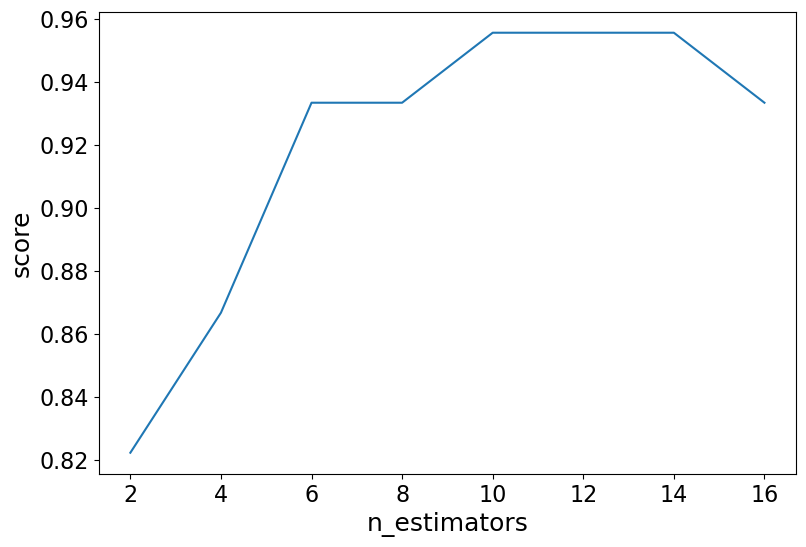

In [30]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (9,6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

plt.show()

> _By iterating through different values for the number of estimators we can see an increase in model performance from **82.2%** to **95.5%**. After 14 estimators the accuracy begins to drop, again if you set a different random_state the values you see will vary. That is why it is best practice to use [cross validation](https://www.w3schools.com/python/python_ml_cross_validation.asp) to ensure stable results._

>_In this case, we see a **13.3%** increase in accuracy when it comes to identifying the type of the wine._

---

## Test your knowledge

In [1]:

example=[{
        "question": "Which statement is correct about bagging?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Many weak learners aggregated typically outperform a single learner over the entire set and have less overfit.",
                "correct": False,
                "feedback": "Correct."
            },
            {
                "answer": "It reduces the number of hyperparameters to tune.",
                "correct": False,
                "feedback": "No, it's not correct."
            },
            {
                "answer": "Reduces variance in high-variance datasets",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Improves the model’s accuracy",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Makes the model more complex.",
                "correct": False,
                "feedback": "No, it's not correct."
            },
            {
                "answer": "Works particularly well with algorithms that are less stable",
                "correct": True,
                "feedback": "No, it's not correct."
            }
        ]
    },
        {
  "question": "In bagging, what does 'bootstrapping' involve?",
  "type": "multiple_choice",
  "answers": [
    {
      "answer": "Removing samples from the dataset",
      "correct": False,
      "feedback": "Not correct."
    },
    {
      "answer": "Randomly selecting samples with replacement",
      "correct": True,
      "feedback": "Correct."
    },
    {
      "answer": "Using all samples without any selection",
      "correct": False,
      "feedback": "Not correct."
    },
    {
      "answer": "Ignoring samples during training",
      "correct": False,
      "feedback": "Not correct."
    }
  ]
},
     {
        "question": "Which of the following statements about bagging is/are correct? (Select all that apply.)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Bagging stands for Boosted Aggregating.",
                "correct": False,
                "feedback": "Wrong answer."
            },
            {
                "answer": "Bagging is a technique used to increase the complexity of individual models.",
                "correct": False,
                "feedback": "Wrong answer."
            },
            {
                "answer": "The main idea behind bagging is to train multiple models on different subsets of the training data.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "In bagging, bootstrapping involves selecting samples without replacement from the dataset.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "The final prediction in bagging is made by averaging the results of each classifier.",
                "correct": True,
                "feedback": "Correct."
            }
        ]
    },
     {
        "question": "Regarding bagging, which of the following statements are true? (Select all that apply.)",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Bagging minimizes the overfitting of data.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "It improves the model's accuracy.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Bagging deals with higher dimensional data efficiently.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "It is easy to draw very precise business insights through bagging because of the averaging involved across predictions.",
                "correct": False,
                "feedback": "Wrong answer."
            },
            {
                "answer": "Bagging slows down and grows more intensive as the number of iterations increases.",
                "correct": True,
                "feedback": "Correct."
            },
            {
                "answer": "Bagging works particularly well with algorithms that are more stable.",
                "correct": False,
                "feedback": "Wrong answer."
            }
        ]
    }
    

]
from jupyterquiz import display_quiz
display_quiz(example)


<IPython.core.display.Javascript object>

---